# Manipulacion de datos representados: Regresion polinomica

¿Qué es la regresión polinomica?

A diferencia de la regresion lineal, en la regresion polinomica la duncion matematica que se pretende que represente el conjunto de datos de muestra es un polinomio. En ocasiones, si nuestros datos no se ajustan a una linea recta, quizas se ajusten de una mejor manera empleando una regresion plinomica.

Python presenta diversos metodos para poder representar un ajuste polinomico, de entre los cuales veremos aquel que pertenece a la libreria NumPy. En el siguiente ejemplo, vamos a mostrar en un diagrama de dispersion los datos obtenidos de 18 coches, concretamente la velocidad que toman en un cierto tramo de carretera y la hora del dia a la que pasan por este.

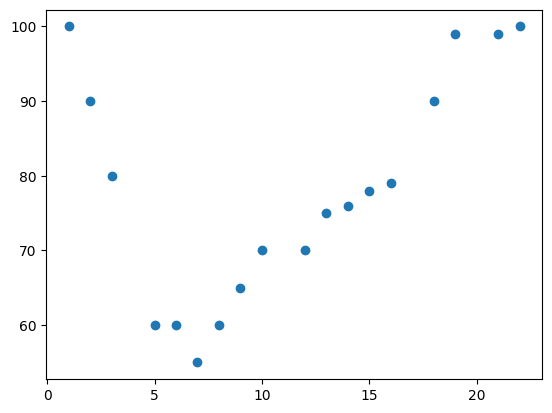

In [3]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22]
y = [100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100]

plt.scatter(x, y)
plt.show()

Seguidamente vamos a añadir al grafico anterior el trazado del polinomio que mejor se ajusta a los datos de vehiculos medidos. Para ello, emplearemos las funciones de NumPy `polyfit()`, la cual se encarga de crear valores de un polinomio que se ajuste a los valores de muestra, y `poly1d()`, la cual se encarga de recrear la ecuacion de un polinomio de una variable.

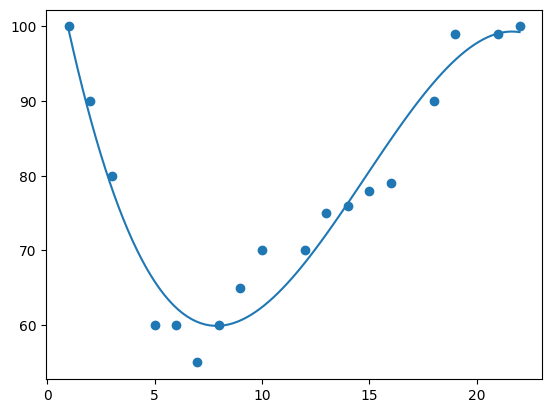

In [4]:
import numpy as np

x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22]
y = [100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

## Relacion entre dos variables: ¿Buena o mala relacion?

Al igual que cimos en la regresion lineal, podemos cuantificar la calidad de la relacion entre los dos conjuntos de datos representados. Para obtener el coeficiente de correlacion en una regresion polimonica, debemos emplear la libreria Scikit-learn, la cual contiene la funcion `r2:_score ()`. Esta ultima funcion nos proporciona un valor entre 0 y 1.

In [5]:
from sklearn.metrics import r2_score

x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22]
y = [100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

print("El coeficiente de correlacion entre las dos variables es de:", r2_score(y, mymodel(x)))

El coeficiente de correlacion entre las dos variables es de: 0.9432150416451026


Dado que el valor del coeficiente de correlación que hemos obtenido se acerca considerablemente a uno, podemos concluir que la relación entre la velocidad del coche y la hora a la que pasa es muy buena si se describe mediante polinomios. Una vez obtenida la función polinómica, que representa la forma fiable los datos medidos, podemos predecir el resultado de valores que no han sido necesariamente medidos. Podemos, por ejemplo, responder a la siguiente pregunta:

### ¿Cuál será la velocidad de un coche que pasa por la carretera a las 5 de la tarde?

In [6]:
x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22]
y = [100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

speed = mymodel(17)

print("La velocidad de un coche que pasa por la carretera a las 5 de la tarde es de", speed, "km/h")

La velocidad de un coche que pasa por la carretera a las 5 de la tarde es de 88.87331269698001 km/h


## Ejemplo de regresion polinomica de mala fiabilidad

Finalmente vamos a representar dos conjuntos de datos en otro diagrama de dispersion para comprobar si ambas variables guardan una buena relacion o no. De forma simultanea, representaremos la curva del polinomio de grado 3 que se ajusta mejor a los datos mostrado, de modo que podemos observar mejor si existe relacion.

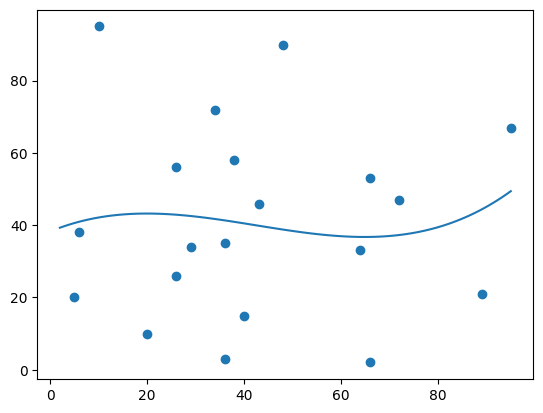

In [8]:
x=[89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,26,66,72,40]
y=[21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel=np.poly1d(np.polyfit(x,y,3))

myline=np.linspace(2,95,100)

plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()

Podemos apreciar que los datos medidos no están nada próximos a la curva del polinomio de ajuste, aspecto gracias al cual podemos concluir que no existe ninguna relación entre las dos variables representadas. Si quisiéramos verificar este hecho numéricamente, podemos recurrir de nuevo al coeficiente de correlación que nos proporciona la librería Scikit-learn.

In [9]:
x=[89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,26,66,72,40]
y=[21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel=np.poly1d(np.polyfit(x,y,3))

print('El coeficiente de correlación entre x y y es:',r2_score(y,mymodel(x)))

El coeficiente de correlación entre x y y es: 0.012833456455728531


Dado que el coeficiente de correlación se acerca bastante a 0, se demuestra que no hay relación entre los dos conjuntos de datos anteriores representados gráficamente. Por lo tanto, no es posible realizar predicciones de valores con el polinomio calculado en la gráfica.